# Quick Start

Extract a complex surface in just a few lines of code.


Extracted 196,176 vertices, 392,348 triangles


2025-12-30 01:10:03.374 (   0.729s) [    7F20291AB740]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=


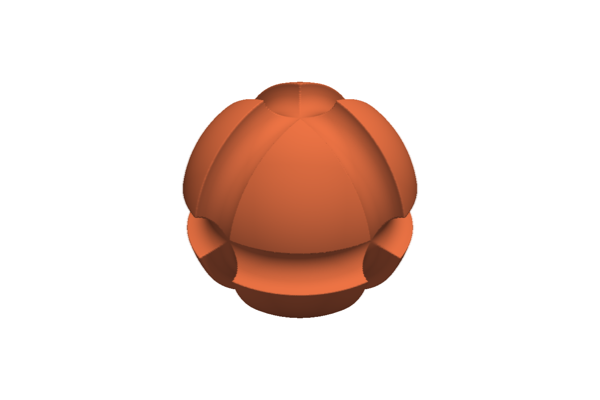

In [1]:
import isoext
from isoext.sdf import (
    SphereSDF, TorusSDF, 
    UnionOp, IntersectionOp, NegationOp, RotationOp
)
from _viz import show_mesh # PyVista renderer, not part of the library

# Create a high-resolution grid
grid = isoext.UniformGrid([256, 256, 256])

# Build a complex shape: sphere with three interlocking toroidal tunnels
sphere = SphereSDF(radius=0.75)
torus = TorusSDF(R=0.75, r=0.15)

shape = IntersectionOp([
    sphere,
    NegationOp(UnionOp([
        torus,
        RotationOp(torus, axis=[1, 0, 0], angle=90),
        RotationOp(torus, axis=[0, 1, 0], angle=90),
    ]))
])

# Evaluate and extract
grid.set_values(shape(grid.get_points()))
vertices, faces = isoext.marching_cubes(grid)

print(f"Extracted {vertices.shape[0]:,} vertices, {faces.shape[0]:,} triangles")
show_mesh(vertices, faces, color="coral")


## What just happened?

1. **Created a grid** — A 256³ lattice of points in 3D space
2. **Computed scalar values** — Evaluated a signed distance function at each point
3. **Extracted the surface** — Marching Cubes found where the scalar field equals zero

## Learn more

- [Working with Grids](grids.ipynb) — How to create grids and set values (including custom functions and neural networks)
- [Marching Cubes](marching_cubes.ipynb) — Triangular mesh extraction
- [Dual Contouring](dual_contouring.ipynb) — Triangle mesh extraction with sharp features
- [SDF Utilities](sdf_guide.ipynb) — Built-in shape primitives and CSG operations
